<a href="https://colab.research.google.com/github/MargauxHofmann/2022_ML_EES/blob/main/ML_Project/ML_GlacierProject_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Project - Predicting Activity of glaciers

Import librairy

In [1]:
import csv
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Download the file into Google Colab

In [2]:
from google.colab import files
uploaded = files.upload()

Saving database.csv to database.csv


In [204]:
df = pd.read_csv("database.csv")
df

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Glacier ID,Political Unit,Continent,Basin Code,Location Code,Glacier Code,Glacier Name,Latitude,Longitude,Primary Class,...,Maximum Length,Maximum Length Exposed,Maximum Length Ablation,Mean Depth,Depth Accuracy,Accumulation Orientation,Ablation Orientation,Topographic Map Year,Topographic Map Scale,Photograph Year
0,AF5Q112B0001,AFGHANISTAN,ASIA,Q112,B0,1,NaN,34.672,68.874,9.0,...,1.9,NaN,NaN,NaN,NaN,NE,NE,1959.0,100000.0,NaN
1,AF5Q112B0002,AFGHANISTAN,ASIA,Q112,B0,2,NaN,34.676,68.855,9.0,...,0.8,NaN,NaN,NaN,NaN,NW,NW,1959.0,100000.0,NaN
2,AF5Q112B0003,AFGHANISTAN,ASIA,Q112,B0,3,NaN,34.689,68.854,9.0,...,1.5,NaN,NaN,NaN,NaN,NW,NW,1959.0,100000.0,NaN
3,AF5Q112B0004,AFGHANISTAN,ASIA,Q112,B0,4,NaN,34.707,68.857,9.0,...,1.5,NaN,NaN,NaN,NaN,NE,NE,1959.0,100000.0,NaN
4,AF5Q112B0005,AFGHANISTAN,ASIA,Q112,B0,5,NaN,34.719,68.852,9.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1959.0,100000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132885,ZR3B410A1002,ZAIRE,AFRICA,B410,A1,2,KRAEPELIN,0.438,29.899,6.0,...,0.1,NaN,NaN,NaN,NaN,NaN,NaN,1968.0,25000.0,NaN
132886,ZR3B410A1003,ZAIRE,AFRICA,B410,A1,3,NORTH-KRAEPELIN,0.440,29.898,6.0,...,0.1,NaN,NaN,NaN,NaN,NW,NW,1968.0,25000.0,NaN
132887,ZR3B410A2002,ZAIRE,AFRICA,B410,A2,2,ALBERT,0.389,29.871,6.0,...,0.1,NaN,NaN,NaN,NaN,NaN,NaN,1968.0,25000.0,NaN
132888,ZR3B410A3001,ZAIRE,AFRICA,B410,A3,1,ALEXANDRA,0.389,29.868,6.0,...,0.8,NaN,NaN,NaN,NaN,W,SW,1968.0,25000.0,NaN


Go through the data

In [ ]:
df.describe()

,Latitude,Longitude,Primary Class,Glacier Source,Basin Count,Glacier Form,Glacier Activity,Activity Start,Activity End,Minimum Elevation,...,Mean Width,Mean Length,Maximum Length,Maximum Length Exposed,Maximum Length Ablation,Mean Depth,Depth Accuracy,Topographic Map Year,Topographic Map Scale,Photograph Year
count,132890.000000,132890.000000,131406.000000,132746.000000,15558.000000,131813.000000,132775.000000,4202.000000,143.000000,117162.000000,...,69966.000000,55258.000000,102593.000000,84621.000000,17051.000000,70071.000000,78685.000000,83697.000000,74586.000000,82464.000000
mean,36.322101,31.902296,5.716231,0.864712,1.031752,3.738918,0.620448,1967.112327,1986.930070,3502.362063,...,0.563436,1.392470,1.417326,1.328634,1.621133,28.415085,2.262960,1970.529565,96838.461508,1974.795899
std,27.821062,83.860643,1.768668,0.494326,0.327473,2.255064,1.072336,11.348193,6.999648,1735.317842,...,0.643816,2.087975,2.560785,1.984061,3.286073,46.480501,0.999009,10.276403,69675.200534,14.107653
min,-71.657200,-179.918000,0.000000,0.000000,1.000000,0.000000,0.000000,1901.000000,1958.000000,0.000000,...,0.000000,0.020000,0.060000,0.000000,0.000000,0.000000,1.000000,1901.000000,750.000000,1900.000000
25%,30.616000,-50.375000,6.000000,1.000000,1.000000,3.000000,0.000000,1963.000000,1986.000000,1800.000000,...,0.300000,0.500000,0.500000,0.500000,0.200000,12.000000,1.000000,1966.000000,50000.000000,1968.000000
50%,38.580000,75.484500,6.000000,1.000000,1.000000,4.000000,0.000000,1967.000000,1986.000000,3840.000000,...,0.400000,0.800000,0.800000,0.800000,0.600000,20.000000,2.000000,1972.000000,90000.000000,1971.000000
75%,49.223000,85.265750,7.000000,1.000000,1.000000,5.000000,1.000000,1975.000000,1988.000000,5020.000000,...,0.700000,1.510000,1.500000,1.500000,2.000000,36.000000,3.000000,1978.000000,100000.000000,1980.000000
max,89.300000,179.680000,9.000000,3.000000,7.000000,9.000000,8.000000,1996.000000,2002.000000,8047.000000,...,29.800000,76.640000,145.000000,125.000000,64.500000,7060.000000,5.000000,1998.000000,1000000.000000,2003.000000


In [ ]:
df.shape

(132890, 39)

In [ ]:
df.isna().sum()

Glacier ID                          0
Political Unit                      0
Continent                           0
Basin Code                          0
Location Code                       0
Glacier Code                        0
Glacier Name                    86139
Latitude                            0
Longitude                           0
Primary Class                    1484
Glacier Source                    144
Basin Count                    117332
Glacier Form                     1077
Glacier Activity                  115
Activity Start                 128688
Activity End                   132747
Minimum Elevation               15728
Minimum Elevation Exposed       43193
Mean Elevation                  51291
Mean Elevation Accumulation    117417
Mean Elevation Ablation        121837
Maximum Elevation               17422
Snow Line Elevation            104042
Snow Line Accuracy             109566
Glacier Area                     4516
Area Accuracy                   48450
Area Exposed

## Snow Line Elevation

Preparing dataset for the models. Selectionning all the columns of interest together, to select only the line without NaN

In [205]:
df_select = df[["Snow Line Elevation", "Latitude", "Longitude", "Glacier Area", "Accumulation Orientation", "Ablation Orientation","Ablation Orientation", "Mean Length", "Mean Elevation","Minimum Elevation", "Maximum Elevation", "Primary Class", "Glacier Form" ]]

In [206]:
df_select_noNan = df_select.dropna()

In [207]:
df_select_noNan.shape

(5700, 13)

Preparing training, validation and tests set

In [208]:
X = df_select_noNan[[ "Latitude", "Longitude", "Glacier Area", "Mean Length", "Mean Elevation","Minimum Elevation", "Maximum Elevation", "Primary Class", "Glacier Form" ]]

In [209]:
y = df_select_noNan[['Snow Line Elevation']]

In [210]:
from sklearn.model_selection import train_test_split
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.3,random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

Standardisation of data

In [211]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_valid_scaled = ss.transform(X_valid)
X_test_scaled = ss.transform(X_test)

Linear Regression

In [212]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit(X_train_scaled, y_train)
y_pred_valid = Lr.predict(X_valid_scaled)
y_pred_valid_df = pd.DataFrame(y_pred_valid)

In [213]:
y_pred_train = Lr.predict(X_train_scaled)
y_pred_train_df = pd.DataFrame(y_pred_train)

In [214]:
y_pred_test = Lr.predict(X_test_scaled)
y_pred_test_df = pd.DataFrame(y_pred_test)

Evaluate the performance of the results

In [215]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

In [216]:
r2_train = r2_score(y_train, y_pred_train_df)
r2_valid = r2_score(y_valid, y_pred_valid_df)
r2_test = r2_score(y_test, y_pred_test_df)
print(f'Training r2 score:{r2_train} \n'
           f'Validation r2 score:{r2_valid} \n'
           f'Test r2 score:{r2_test} \n')

Training r2 score:0.9857419720934129 
Validation r2 score:0.9784370529543466 
Test r2 score:0.9882704685529391 



In [217]:
explained_variance_train = explained_variance_score(y_train, # We'll need our ground truth
                   y_pred_train_df) # and our predictions
print(explained_variance_train) 

0.9857419720934129


In [218]:
explained_variance_valid = explained_variance_score(y_valid, # We'll need our ground truth
                   y_pred_valid_df) # and our predictions
print(explained_variance_valid) 

0.9784375904335074


In [219]:
explained_variance_test = explained_variance_score(y_test, # We'll need our ground truth
                   y_pred_test_df) # and our predictions
print(explained_variance_test)               

0.9882746124722868


In [220]:
print(f'Training variance explained:{explained_variance_train} \n'
           f'Validation variance explained:{explained_variance_valid} \n'
           f'Test variance explained:{explained_variance_test} \n')

Training variance explained:0.9857419720934129 
Validation variance explained:0.9784375904335074 
Test variance explained:0.9882746124722868 



In [221]:
from sklearn.metrics import mean_absolute_error

In [222]:
print(mean_absolute_error(y_test, y_pred_test))
print(mean_absolute_error(y_valid, y_pred_valid))
print(mean_absolute_error(y_train, y_pred_train))

85.64009439514233
84.86757054279803
85.75213420671265


Features importance

In [223]:
importances = pd.DataFrame(data={
    'Variable': X_train.columns,
    'Importance': Lr.coef_[0]
    })

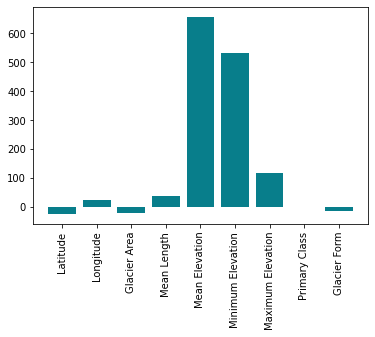

In [224]:
plt.bar(x=importances['Variable'], height=importances['Importance'], color='#087E8B')
plt.xticks(rotation='vertical')
plt.show()

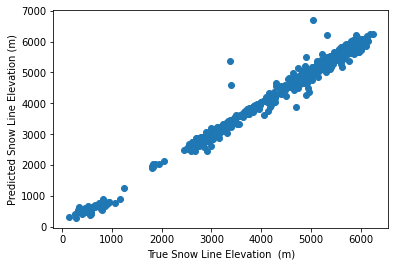

In [225]:
plt.scatter(y_test,y_pred_test);
plt.xlabel('True Snow Line Elevation  (m)');
plt.ylabel('Predicted Snow Line Elevation (m)');

Trying with only the mean elevation as predictor 

In [226]:
X = df_select_noNan[["Mean Elevation"]]

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [228]:
Lr = LinearRegression()
Lr.fit(X_train, y_train)
y_pred = Lr.predict(X_test)
y_pred_df = pd.DataFrame(y_pred)
explained_variance = explained_variance_score(y_test, # We'll need our ground truth
                   y_pred_df) # and our predictions
print(explained_variance)  

0.9788400077439836


## Predicting Activity

Prepare the dataset

In [229]:
df_select = df[["Glacier Activity", "Snow Line Elevation","Latitude", "Longitude", "Glacier Area", "Mean Elevation","Minimum Elevation", "Maximum Elevation", "Primary Class", "Glacier Form" ]]

In [230]:
df_select

,Glacier Activity,Snow Line Elevation,Latitude,Longitude,Glacier Area,Mean Elevation,Minimum Elevation,Maximum Elevation,Primary Class,Glacier Form
0,0.0,NaN,34.672,68.874,1.28,4110.0,3975.0,4250.0,9.0,3.0
1,0.0,NaN,34.676,68.855,0.31,4350.0,4250.0,4450.0,9.0,3.0
2,0.0,NaN,34.689,68.854,0.60,4100.0,4000.0,4200.0,9.0,3.0
3,0.0,NaN,34.707,68.857,0.56,4175.0,4000.0,4350.0,9.0,3.0
4,0.0,NaN,34.719,68.852,1.06,4050.0,3750.0,4350.0,9.0,2.0
...,...,...,...,...,...,...,...,...,...,...
132885,0.0,NaN,0.438,29.899,0.04,NaN,4630.0,4750.0,6.0,8.0
132886,0.0,NaN,0.440,29.898,0.02,NaN,4690.0,4750.0,6.0,4.0
132887,0.0,NaN,0.389,29.871,0.02,5030.0,NaN,5095.0,6.0,3.0
132888,0.0,NaN,0.389,29.868,0.25,4740.0,4510.0,5060.0,6.0,4.0


Replace the 0 value (which means uncertained activity) by NaN values

In [231]:
df_select['Glacier Activity'] = df['Glacier Activity'].replace(0, np.nan)

<ipython-input-231-b5e3fd7f1cd7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['Glacier Activity'] = df['Glacier Activity'].replace(0, np.nan)


Check that it worked

In [232]:
df_select

,Glacier Activity,Snow Line Elevation,Latitude,Longitude,Glacier Area,Mean Elevation,Minimum Elevation,Maximum Elevation,Primary Class,Glacier Form
0,NaN,NaN,34.672,68.874,1.28,4110.0,3975.0,4250.0,9.0,3.0
1,NaN,NaN,34.676,68.855,0.31,4350.0,4250.0,4450.0,9.0,3.0
2,NaN,NaN,34.689,68.854,0.60,4100.0,4000.0,4200.0,9.0,3.0
3,NaN,NaN,34.707,68.857,0.56,4175.0,4000.0,4350.0,9.0,3.0
4,NaN,NaN,34.719,68.852,1.06,4050.0,3750.0,4350.0,9.0,2.0
...,...,...,...,...,...,...,...,...,...,...
132885,NaN,NaN,0.438,29.899,0.04,NaN,4630.0,4750.0,6.0,8.0
132886,NaN,NaN,0.440,29.898,0.02,NaN,4690.0,4750.0,6.0,4.0
132887,NaN,NaN,0.389,29.871,0.02,5030.0,NaN,5095.0,6.0,3.0
132888,NaN,NaN,0.389,29.868,0.25,4740.0,4510.0,5060.0,6.0,4.0


In [233]:
df_select.isna().sum()

Glacier Activity        94618
Snow Line Elevation    104042
Latitude                    0
Longitude                   0
Glacier Area             4516
Mean Elevation          51291
Minimum Elevation       15728
Maximum Elevation       17422
Primary Class            1484
Glacier Form             1077
dtype: int64

In [234]:
df_select_noNan = df_select.dropna()

In [ ]:
df_select_noNan.shape

(4988, 10)

Select the predictors

In [235]:
X = df_select_noNan[["Snow Line Elevation", "Latitude", "Longitude", "Glacier Area", "Mean Elevation","Minimum Elevation", "Maximum Elevation", "Primary Class", "Glacier Form" ]]

The categorical variable are already set into number from 0 to 8

Select the varible to predict

In [236]:
y = df_select_noNan[["Glacier Activity"]]

Here I just export it as a csv file 

In [ ]:
y.to_csv('glacier activity.csv', index=False)

In [ ]:
y.dtypes

Glacier Activity    float64
dtype: object

Prepare the train/validation/test set

In [237]:
from sklearn.model_selection import train_test_split
X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, y, test_size=0.3,random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size=0.5,random_state=42)

### Logistic Regression

We begin with a logistic regression, as a simple baseline model

In [238]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
Lr = Lr.fit(X_train, y_train)
y_pred_valid_lr = Lr.predict(X_valid)
y_pred_test_lr = Lr.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluate performance of model

In [239]:
from sklearn.metrics import accuracy_score

In [240]:
print(f'Accuracy over validation set: {(accuracy_score(y_true=y_valid, y_pred=y_pred_valid_lr)):.2%}')

Accuracy over validation set: 63.10%


In [241]:
y_pred_test_lr = Lr.predict(X_test)

In [242]:
print(f'Accuracy over test set: {(accuracy_score(y_true=y_test, y_pred=y_pred_test_lr)):.2%}')

Accuracy over test set: 63.68%


In [243]:
y_pred_train_lr = Lr.predict(X_train)

In [244]:
print(f'Accuracy over train set: {(accuracy_score(y_true=y_train, y_pred=y_pred_train_lr)):.2%}')

Accuracy over train set: 64.19%


In [245]:
acc_train_lr=accuracy_score(y_true=y_train, y_pred=y_pred_train_lr)
acc_valid_lr=accuracy_score(y_true=y_valid, y_pred=y_pred_valid_lr)
acc_test_lr=accuracy_score(y_true=y_test, y_pred=y_pred_test_lr)

Store the results

In [246]:
accuracy_Lr = [acc_train_lr, acc_valid_lr, acc_test_lr]
accuracy_Lr = pd.DataFrame(accuracy_Lr, columns=['Lr'])
accuracy_Lr

,Lr
0,0.641936
1,0.631016
2,0.636849


Give not very good reslult, but don't seem to overfit the data

Feature importances

In [247]:
coefs = pd.DataFrame(
   Lr.coef_[0],
   columns=['Coefficients'], index=X_train.columns
)

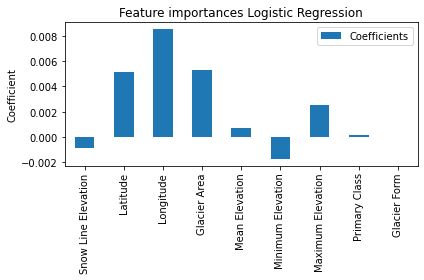

In [248]:
fig, ax = plt.subplots()
coefs.plot.bar( ax=ax)
ax.set_title("Feature importances Logistic Regression")
ax.set_ylabel("Coefficient")
fig.tight_layout()

Let's try to do better

### Decision Tree Classifier

In [249]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

First by doing a simple decision tree

In [250]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)
y_pred_valid = DTC.predict(X_valid)
print(f'Accuracy over validation set: {(accuracy_score(y_true=y_valid, y_pred=y_pred_valid)):.2%}')

Accuracy over validation set: 76.07%


In [251]:
y_pred_train = DTC.predict(X_train)
print(f'Accuracy over validation set: {(accuracy_score(y_true=y_train, y_pred=y_pred_train)):.2%}')

Accuracy over validation set: 100.00%


Let's try to do better with tuning the hyperparameters with GridSearch

In [252]:
param_grid = {
    'max_depth': [20,60,80, 100],
    'max_features': [1,2, 3,4,6,8],
    'min_samples_leaf': [2,3, 4, 5],
    'min_samples_split': [2,4,8, 12],
}

In [253]:
gsc_tree = GridSearchCV(DTC,param_grid,cv=3,verbose=1)
gsc_tree.fit(X_train,y_train)

Fitting 3 folds for each of 384 candidates, totalling 1152 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [20, 60, 80, 100],
                         'max_features': [1, 2, 3, 4, 6, 8],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 4, 8, 12]},
             verbose=1)

In [254]:
best_tree=gsc_tree.best_estimator_
print(gsc_tree.best_estimator_)

DecisionTreeClassifier(max_depth=20, max_features=8, min_samples_leaf=4,
                       min_samples_split=12)


Implemented the Decision Tree with the best parameters

In [255]:
DTC_2 = DecisionTreeClassifier(
 max_depth= 80,
 max_features= 8,
 min_samples_leaf= 4,
 min_samples_split= 12)
DTC_2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=80, max_features=8, min_samples_leaf=4,
                       min_samples_split=12)

In [256]:
y_pred_valid_2 = DTC_2.predict(X_valid)
print(f'Accuracy over validation set: {(accuracy_score(y_true=y_valid, y_pred=y_pred_valid_2)):.2%}')

Accuracy over validation set: 77.14%


In [257]:
y_pred_test = DTC_2.predict(X_test)
print(f'Accuracy over test set: {(accuracy_score(y_true=y_test, y_pred=y_pred_test)):.2%}')

Accuracy over test set: 78.50%


In [258]:
y_pred_train = DTC_2.predict(X_train)
print(f'Accuracy over train set: {(accuracy_score(y_true=y_train, y_pred=y_pred_train)):.2%}')

Accuracy over train set: 89.63%


As we obtain a large better result with the train set, we can imagine the it's overfitting the data

Feature importance

In [260]:
tree_importances = DTC_2.feature_importances_
tree_importance = pd.Series(tree_importances, index=X_train.columns)
tree_importance

Snow Line Elevation    0.045116
Latitude               0.281163
Longitude              0.482982
Glacier Area           0.034659
Mean Elevation         0.030162
Minimum Elevation      0.045132
Maximum Elevation      0.042354
Primary Class          0.023006
Glacier Form           0.015427
dtype: float64

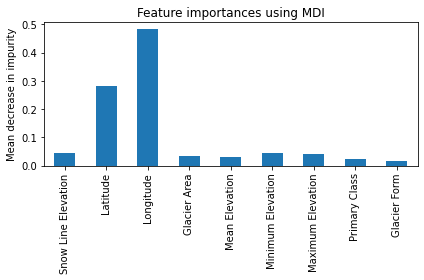

In [261]:
fig, ax = plt.subplots()
tree_importance.plot.bar( ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Let's try to obtain better and less overfitting, with a Random Forest

## Random Forest Classifier --> ensemble learning

In [262]:
from sklearn.ensemble import RandomForestClassifier

Try with the default parameters

In [263]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
y_pred_valid_RFC=RFC.predict(X_valid)

<ipython-input-263-bd3e038c6c6a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC.fit(X_train, y_train)


In [264]:
print(f'Accuracy over validation set: {(accuracy_score(y_true=y_valid, y_pred=y_pred_valid_RFC)):.2%}')

Accuracy over validation set: 81.42%


We already obtain a better prediction

In [265]:
y_pred_test_RFC=RFC.predict(X_test)
print(f'Accuracy over test set: {(accuracy_score(y_true=y_test, y_pred=y_pred_test_RFC)):.2%}')

Accuracy over test set: 80.91%


In [266]:
y_pred_train_RFC=RFC.predict(X_train)
print(f'Accuracy over training set: {(accuracy_score(y_true=y_train, y_pred=y_pred_train_RFC)):.2%}')

Accuracy over training set: 100.00%


Store those result

In [267]:
acc_train_rf=accuracy_score(y_true=y_train, y_pred=y_pred_train_RFC)
acc_valid_rf=accuracy_score(y_true=y_valid, y_pred=y_pred_valid_RFC)
acc_test_rf=accuracy_score(y_true=y_test, y_pred=y_pred_test_RFC)

In [268]:
accuracy_rf = [acc_train_rf, acc_valid_rf, acc_test_rf]
accuracy_rf = pd.DataFrame(accuracy_rf, columns=['RFC'])
accuracy_rf

,RFC
0,1.000000
1,0.814171
2,0.809079


In [269]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred_test_RFC)
cm_train = confusion_matrix(y_train ,y_pred_train_RFC)
cm_valid = confusion_matrix(y_valid ,y_pred_valid_RFC)

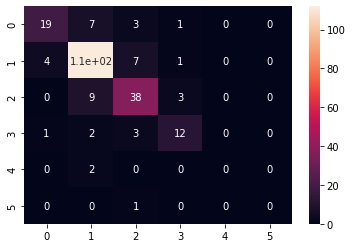

In [185]:
sns.heatmap(cm_test, annot=True)

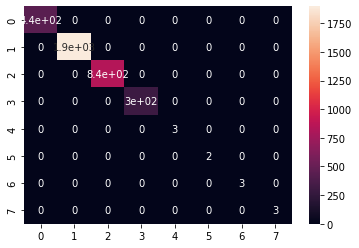

In [186]:
sns.heatmap(cm_train, annot=True)

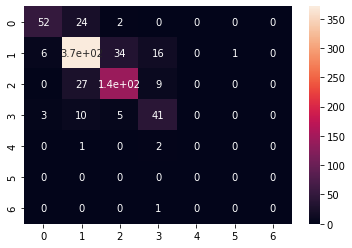

In [188]:
sns.heatmap(cm_valid, annot=True)

Tuning the hyperparameters

In [270]:
RFC_2 = RandomForestClassifier()

In [118]:
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [20,60,80, 100],
    'max_features': [1,2, 3,4,8],
    'min_samples_leaf': [2,3, 4, 5],
    'min_samples_split': [2,4,8, 12],
    'n_estimators': [100, 200, 300]
}

In [119]:
grid_search = GridSearchCV(estimator = RFC_2, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [120]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1920 candidates, totalling 5760 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [20, 60, 80, 100],
                         'max_features': [1, 2, 3, 4, 8],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 4, 8, 12],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [ ]:
best_param=grid_search.best_params_
best_param

The best parameters changes when I run again the model. The parameters that gave me the best result are written in the cell below, to initiate the RFC_2

In [271]:
RFC_2 = RandomForestClassifier(bootstrap=True,
 max_depth= 80,
 max_features= 3,
 min_samples_leaf= 3,
 min_samples_split= 8,
 n_estimators= 200)

In [272]:
RFC_2.fit(X_train,y_train)

<ipython-input-272-52f6cd023c9c>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC_2.fit(X_train,y_train)


RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=200)

In [273]:
y_pred_valid_RFC_2 = RFC_2.predict(X_valid)

In [274]:
print(f'Accuracy over validation set: {(accuracy_score(y_true=y_valid, y_pred=y_pred_valid_RFC_2)):.2%}')

Accuracy over validation set: 82.62%


In [275]:
y_pred_test_RFC_2 = RFC_2.predict(X_test)

In [276]:
print(f'Accuracy over test set: {(accuracy_score(y_true=y_test, y_pred=y_pred_test_RFC_2)):.2%}')

Accuracy over test set: 81.31%


In [277]:
y_pred_train_RFC_2 = RFC_2.predict(X_train)

In [278]:
print(f'Accuracy over training set: {(accuracy_score(y_true=y_train, y_pred=y_pred_train_RFC_2)):.2%} \n' 
f'Accuracy over test set: {(accuracy_score(y_true=y_test, y_pred=y_pred_test_RFC_2)):.2%} \n'
f'Accuracy over validation set: {(accuracy_score(y_true=y_valid, y_pred=y_pred_valid_RFC_2)):.2%}')

Accuracy over training set: 93.18% 
Accuracy over test set: 81.31% 
Accuracy over validation set: 82.62%


Other evaluation metrics

In [279]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test_RFC_2))

              precision    recall  f1-score   support

         1.0       0.90      0.69      0.78       108
         2.0       0.83      0.90      0.86       387
         3.0       0.76      0.79      0.78       184
         4.0       0.75      0.66      0.70        64
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         3
         7.0       0.00      0.00      0.00         1
         8.0       0.00      0.00      0.00         0

    accuracy                           0.81       749
   macro avg       0.41      0.38      0.39       749
weighted avg       0.81      0.81      0.81       749



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

Store the results

In [280]:
acc_train_rf2=accuracy_score(y_true=y_train, y_pred=y_pred_train_RFC_2)
acc_valid_rf2=accuracy_score(y_true=y_valid, y_pred=y_pred_valid_RFC_2)
acc_test_rf2=accuracy_score(y_true=y_test, y_pred=y_pred_test_RFC_2)

In [281]:
accuracy_rf2 = [acc_train_rf2, acc_valid_rf2, acc_test_rf2]
# Create the pandas DataFrame with column name is provided explicitly
accuracy_rf2 = pd.DataFrame(accuracy_rf2, columns=['RFC2'])
# print dataframe.
accuracy_rf2

,RFC2
0,0.931825
1,0.826203
2,0.813084


Join all the result

In [282]:
accuracy = pd.concat([accuracy_Lr, accuracy_rf2], axis=1)
accuracy

,Lr,RFC2
0,0.641936,0.931825
1,0.631016,0.826203
2,0.636849,0.813084


In [283]:
accuracy_new = accuracy.rename(index={0: 'Train', 1:'Valid', 2:'Test'})
accuracy_new

,Lr,RFC2
Train,0.641936,0.931825
Valid,0.631016,0.826203
Test,0.636849,0.813084


The result with the tuning of the hyperparameters are not so much better. 

Feature importance


In [284]:
importances = RFC_2.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFC_2.estimators_], axis=0)

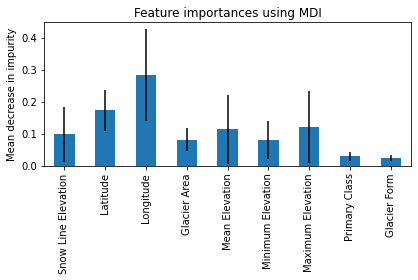

In [285]:
forest_importances = pd.Series(importances, index=X_train.columns)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Plot with the feature importance for the decision tree + the random forest

In [286]:
importance = pd.concat([tree_importance, forest_importances], axis=1)
importance

,0,1
Snow Line Elevation,0.045116,0.097753
Latitude,0.281163,0.173635
Longitude,0.482982,0.283258
Glacier Area,0.034659,0.080795
Mean Elevation,0.030162,0.112853
Minimum Elevation,0.045132,0.080320
Maximum Elevation,0.042354,0.119863
Primary Class,0.023006,0.028706
Glacier Form,0.015427,0.022817


In [287]:
labels = list(importance.index.values)

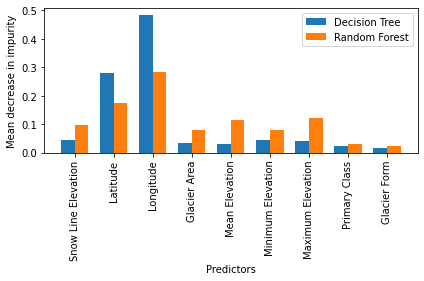

In [288]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, importance[0], width, label='Decision Tree')
rects2 = ax.bar(x + width/2, importance[1], width, label='Random Forest')

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Scores')
#ax.set_title('Scores by group and gender')
#ax.set_xticks(x, labels)
#ax.legend()

plt.xticks(x, labels)
plt.xticks(rotation = 90)
plt.xlabel("Predictors")
plt.ylabel("Mean decrease in impurity")
plt.legend()

fig.tight_layout()

plt.show()

Confusion Matrix

In [289]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test_RFC_2)

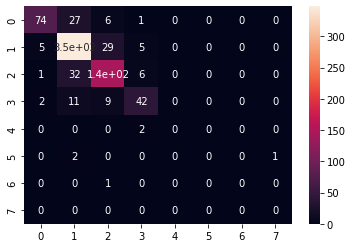

In [290]:
sns.heatmap(cm, annot=True)

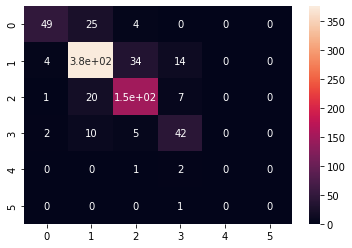

In [291]:
cm_valid = confusion_matrix(y_valid, y_pred_valid_RFC_2)
sns.heatmap(cm_valid, annot=True)

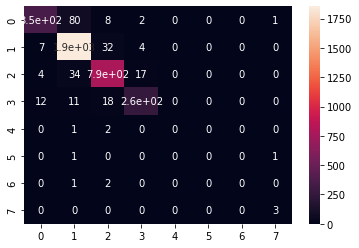

In [292]:
cm_train = confusion_matrix(y_train, y_pred_train_RFC_2)
sns.heatmap(cm_train, annot=True)